In [1]:
#import necessary packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [2]:
# load preprocessed data
train_data=pd.read_csv("E:\\10xAccademy_Practice\\Week 3\\Week 3 Challenge\\Sales Data Prediction\\Data\\rossmann-store-sales\\processed_TrainingData.csv")
test_data=pd.read_csv("E:\\10xAccademy_Practice\\Week 3\\Week 3 Challenge\\Sales Data Prediction\\Data\\rossmann-store-sales\\Processed_TestData.csv")

In [3]:
train_data.head(5)

Unnamed: 0        Date  Store  DayOfWeek  Sales  Customers  Open  Promo  \
0           0  2015-07-31      1          4   5263        555     1      1   
1           1  2015-07-30      1          3   5020        546     1      1   
2           2  2015-07-29      1          2   4782        523     1      1   
3           3  2015-07-28      1          1   5011        560     1      1   
4           4  2015-07-27      1          0   6102        612     1      1   

  StateHoliday  SchoolHoliday  ... Promo2 Promo2SinceWeek  Promo2SinceYear  \
0            0              1  ...      0             NaN              NaN   
1            0              1  ...      0             NaN              NaN   
2            0              1  ...      0             NaN              NaN   
3            0              1  ...      0             NaN              NaN   
4            0              1  ...      0             NaN              NaN   

   PromoInterval  Year  Month  Day  weekday weekofyear  weekend  
0            NaN  2015      7   31        4         31        0  
1            NaN  2015      7   30        3         31        0  
2            NaN  2015      7   29        2         31        0  
3            NaN  2015      7   28        1         31        0  
4            NaN  2015      7   27        0         31        1  

[5 rows x 25 columns]

In [4]:
test_data.head(5)

Unnamed: 0        Date    Id  Store  DayOfWeek  Open  Promo StateHoliday  \
0           0  2015-09-17     1      1          3   1.0      1            0   
1           1  2015-09-16   857      1          2   1.0      1            0   
2           2  2015-09-15  1713      1          1   1.0      1            0   
3           3  2015-09-14  2569      1          0   1.0      1            0   
4           4  2015-09-13  3425      1          6   0.0      0            0   

   SchoolHoliday StoreType  ... Promo2  Promo2SinceWeek  Promo2SinceYear  \
0              0         c  ...      0              NaN              NaN   
1              0         c  ...      0              NaN              NaN   
2              0         c  ...      0              NaN              NaN   
3              0         c  ...      0              NaN              NaN   
4              0         c  ...      0              NaN              NaN   

   PromoInterval  Year  Month  Day weekday  weekofyear  weekend  
0            NaN  2015      9   17       3          38        0  
1            NaN  2015      9   16       2          38        0  
2            NaN  2015      9   15       1          38        0  
3            NaN  2015      9   14       0          38        1  
4            NaN  2015      9   13       6          37        1  

[5 rows x 24 columns]

In [6]:
train_data.isnull().sum()

Unnamed: 0                        0
Date                              0
Store                             0
DayOfWeek                         0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
Year                              0
Month                             0
Day                               0
weekday                           0
weekofyear                        0
weekend                           0
dtype: int64

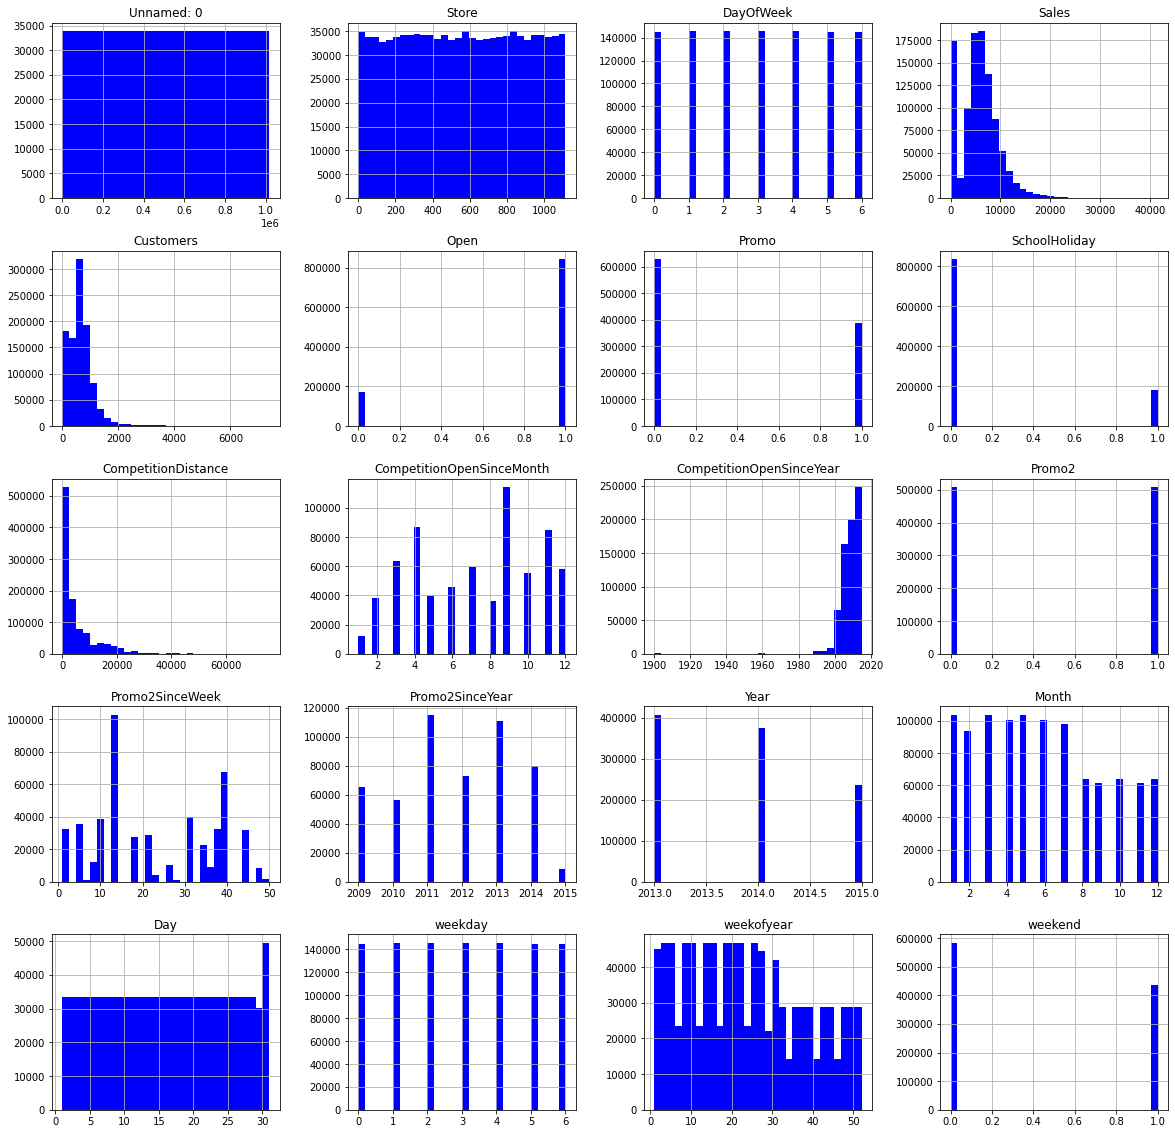

In [7]:
train_data.hist(bins = 30, figsize = (20, 20), color = 'b');

In [22]:
train_data.sort_values(["Store","Date"], ignore_index=True, inplace=True)
test_data.sort_values(["Store","Date"], ignore_index=True, inplace=True)

In [23]:
train_data.head()

Unnamed: 0  Store  DayOfWeek  Sales  Customers  Open  Promo StateHoliday  \
0         941      1          1      0          0     0      0            a   
1         940      1          2   5530        668     1      0            0   
2         939      1          3   4327        578     1      0            0   
3         938      1          4   4486        619     1      0            0   
4         937      1          5   4997        635     1      0            0   

   SchoolHoliday StoreType  ... Promo2  Promo2SinceWeek  Promo2SinceYear  \
0              1         c  ...      0              NaN              NaN   
1              1         c  ...      0              NaN              NaN   
2              1         c  ...      0              NaN              NaN   
3              1         c  ...      0              NaN              NaN   
4              1         c  ...      0              NaN              NaN   

   PromoInterval  Year  Month  Day weekday  weekofyear  weekend  
0            NaN  2013      1    1       1           1        0  
1            NaN  2013      1    2       2           1        0  
2            NaN  2013      1    3       3           1        0  
3            NaN  2013      1    4       4           1        0  
4            NaN  2013      1    5       5           1        1  

[5 rows x 24 columns]

In [10]:
test_data.tail()

Unnamed: 0        Date    Id  Store  DayOfWeek  Open  Promo  \
41083       41044  2015-09-13  4280   1115          6   0.0      0   
41084       41043  2015-09-14  3424   1115          0   1.0      1   
41085       41042  2015-09-15  2568   1115          1   1.0      1   
41086       41041  2015-09-16  1712   1115          2   1.0      1   
41087       41040  2015-09-17   856   1115          3   1.0      1   

      StateHoliday  SchoolHoliday StoreType  ... Promo2  Promo2SinceWeek  \
41083            0              0         d  ...      1             22.0   
41084            0              0         d  ...      1             22.0   
41085            0              0         d  ...      1             22.0   
41086            0              0         d  ...      1             22.0   
41087            0              0         d  ...      1             22.0   

       Promo2SinceYear     PromoInterval  Year  Month  Day weekday  \
41083           2012.0  Mar,Jun,Sept,Dec  2015      9   13       6   
41084           2012.0  Mar,Jun,Sept,Dec  2015      9   14       0   
41085           2012.0  Mar,Jun,Sept,Dec  2015      9   15       1   
41086           2012.0  Mar,Jun,Sept,Dec  2015      9   16       2   
41087           2012.0  Mar,Jun,Sept,Dec  2015      9   17       3   

       weekofyear  weekend  
41083          37        1  
41084          38        1  
41085          38        0  
41086          38        0  
41087          38        0  

[5 rows x 24 columns]

In [11]:
#Make Date column the index
train_data.set_index('Date', inplace=True)
test_data.set_index('Date', inplace=True)

In [12]:
test_data.head()

Unnamed: 0     Id  Store  DayOfWeek  Open  Promo StateHoliday  \
Date                                                                        
2015-08-01          47  40233      1          5   1.0      0            0   
2015-08-02          46  39377      1          6   0.0      0            0   
2015-08-03          45  38521      1          0   1.0      1            0   
2015-08-04          44  37665      1          1   1.0      1            0   
2015-08-05          43  36809      1          2   1.0      1            0   

            SchoolHoliday StoreType Assortment  ...  Promo2  Promo2SinceWeek  \
Date                                            ...                            
2015-08-01              1         c          a  ...       0              NaN   
2015-08-02              1         c          a  ...       0              NaN   
2015-08-03              1         c          a  ...       0              NaN   
2015-08-04              1         c          a  ...       0              NaN   
2015-08-05              1         c          a  ...       0              NaN   

            Promo2SinceYear  PromoInterval  Year  Month Day  weekday  \
Date                                                                   
2015-08-01              NaN            NaN  2015      8   1        5   
2015-08-02              NaN            NaN  2015      8   2        6   
2015-08-03              NaN            NaN  2015      8   3        0   
2015-08-04              NaN            NaN  2015      8   4        1   
2015-08-05              NaN            NaN  2015      8   5        2   

            weekofyear  weekend  
Date                             
2015-08-01          31        1  
2015-08-02          31        1  
2015-08-03          32        1  
2015-08-04          32        0  
2015-08-05          32        0  

[5 rows x 23 columns]

In [13]:
train_data.head()

Unnamed: 0  Store  DayOfWeek  Sales  Customers  Open  Promo  \
Date                                                                      
2013-01-01         941      1          1      0          0     0      0   
2013-01-02         940      1          2   5530        668     1      0   
2013-01-03         939      1          3   4327        578     1      0   
2013-01-04         938      1          4   4486        619     1      0   
2013-01-05         937      1          5   4997        635     1      0   

           StateHoliday  SchoolHoliday StoreType  ... Promo2  Promo2SinceWeek  \
Date                                              ...                           
2013-01-01            a              1         c  ...      0              NaN   
2013-01-02            0              1         c  ...      0              NaN   
2013-01-03            0              1         c  ...      0              NaN   
2013-01-04            0              1         c  ...      0              NaN   
2013-01-05            0              1         c  ...      0              NaN   

            Promo2SinceYear  PromoInterval  Year  Month  Day weekday  \
Date                                                                   
2013-01-01              NaN            NaN  2013      1    1       1   
2013-01-02              NaN            NaN  2013      1    2       2   
2013-01-03              NaN            NaN  2013      1    3       3   
2013-01-04              NaN            NaN  2013      1    4       4   
2013-01-05              NaN            NaN  2013      1    5       5   

            weekofyear  weekend  
Date                             
2013-01-01           1        0  
2013-01-02           1        0  
2013-01-03           1        0  
2013-01-04           1        0  
2013-01-05           1        1  

[5 rows x 24 columns]

In [14]:
train_data.shape

(1017209, 24)

In [24]:
train_data.columns.tolist()

['Unnamed: 0',
 'Store',
 'DayOfWeek',
 'Sales',
 'Customers',
 'Open',
 'Promo',
 'StateHoliday',
 'SchoolHoliday',
 'StoreType',
 'Assortment',
 'CompetitionDistance',
 'CompetitionOpenSinceMonth',
 'CompetitionOpenSinceYear',
 'Promo2',
 'Promo2SinceWeek',
 'Promo2SinceYear',
 'PromoInterval',
 'Year',
 'Month',
 'Day',
 'weekday',
 'weekofyear',
 'weekend']

In [25]:
#Drop Unamed column
train_data.drop('Unnamed: 0',inplace = True, axis=1)  #Because it is not in the test set

In [26]:
train_data.head()

Store  DayOfWeek  Sales  Customers  Open  Promo StateHoliday  \
0      1          1      0          0     0      0            a   
1      1          2   5530        668     1      0            0   
2      1          3   4327        578     1      0            0   
3      1          4   4486        619     1      0            0   
4      1          5   4997        635     1      0            0   

   SchoolHoliday StoreType Assortment  ...  Promo2  Promo2SinceWeek  \
0              1         c          a  ...       0              NaN   
1              1         c          a  ...       0              NaN   
2              1         c          a  ...       0              NaN   
3              1         c          a  ...       0              NaN   
4              1         c          a  ...       0              NaN   

   Promo2SinceYear  PromoInterval  Year  Month Day  weekday  weekofyear  \
0              NaN            NaN  2013      1   1        1           1   
1              NaN            NaN  2013      1   2        2           1   
2              NaN            NaN  2013      1   3        3           1   
3              NaN            NaN  2013      1   4        4           1   
4              NaN            NaN  2013      1   5        5           1   

   weekend  
0        0  
1        0  
2        0  
3        0  
4        1  

[5 rows x 23 columns]

In [27]:
#Drop Unamed from test data
test_data.drop('Unnamed: 0',inplace = True, axis=1)  #Because it is not in the test set

In [28]:
test_data.head()

Id  Store  DayOfWeek  Open  Promo StateHoliday  SchoolHoliday StoreType  \
0  40233      1          5   1.0      0            0              1         c   
1  39377      1          6   0.0      0            0              1         c   
2  38521      1          0   1.0      1            0              1         c   
3  37665      1          1   1.0      1            0              1         c   
4  36809      1          2   1.0      1            0              1         c   

  Assortment  CompetitionDistance  ...  Promo2  Promo2SinceWeek  \
0          a               1270.0  ...       0              NaN   
1          a               1270.0  ...       0              NaN   
2          a               1270.0  ...       0              NaN   
3          a               1270.0  ...       0              NaN   
4          a               1270.0  ...       0              NaN   

   Promo2SinceYear  PromoInterval  Year Month  Day  weekday  weekofyear  \
0              NaN            NaN  2015     8    1        5          31   
1              NaN            NaN  2015     8    2        6          31   
2              NaN            NaN  2015     8    3        0          32   
3              NaN            NaN  2015     8    4        1          32   
4              NaN            NaN  2015     8    5        2          32   

   weekend  
0        1  
1        1  
2        1  
3        0  
4        0  

[5 rows x 22 columns]

In [15]:
test_data.shape

(41088, 23)

In [16]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join('E:\\10xAccademy_Practice\\Week 3\\Week 3 Challenge\\Sales Data Prediction\\Data_preparation')))
"""
Import required Data processing scripts
"""

from Data_Loader import Data_Loader 
from Preprocess_Working_Data import Data_Preprocessing
from Make_Plots import Make_Plots

In [17]:
DL=Data_Loader()
dp=Data_Preprocessing()
mp=Make_Plots()

# Distribution of Promotion in Training and testing Data

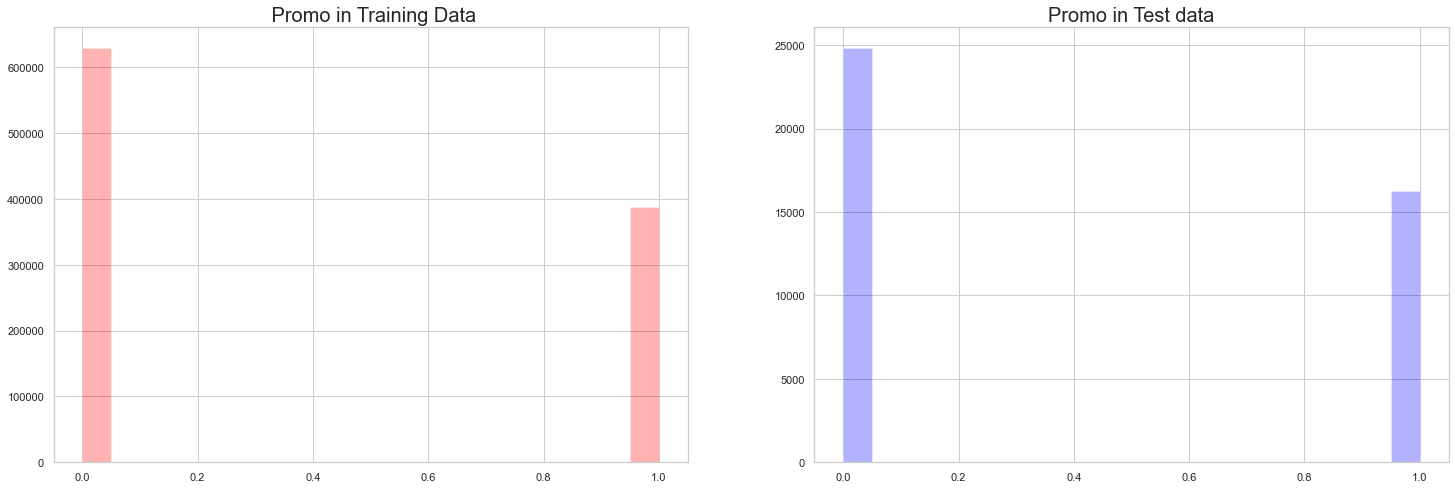

In [18]:
mp.plot_subplots(train_data['Promo'], test_data['Promo'], ' Promo in Training Data', 'Promo in Test data')

<AxesSubplot:xlabel='Year', ylabel='Sales'>

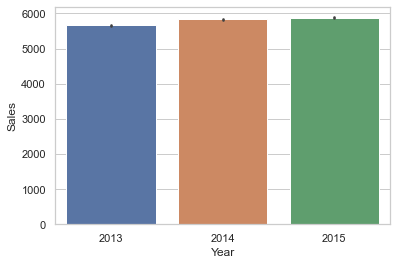

In [19]:
sns.barplot(data=train_data, x="Year", y="Sales")

# Sales Distribution during holiday 

<AxesSubplot:xlabel='StateHoliday', ylabel='Sales'>

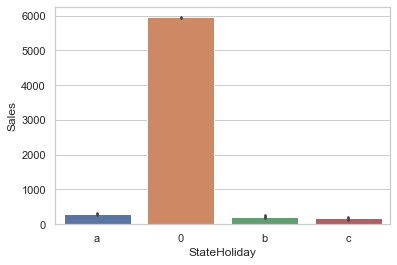

In [20]:
sns.barplot(data=train_data, x="StateHoliday", y="Sales")

<AxesSubplot:xlabel='StateHoliday', ylabel='Sales'>

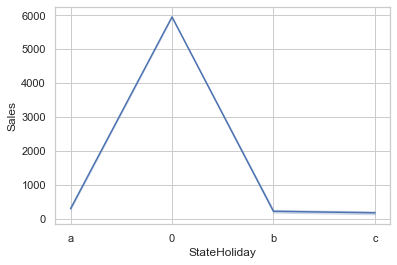

In [29]:
sns.lineplot(data=train_data, x="StateHoliday", y="Sales")

axis = train_data.groupby('StateHoliday')[['Sales']].mean()
fig = px.line(axis, x = axis.index, y = 'Sales', title = 'Average sales per StateHoliday', markers = True)
fig.show()

# From the above plot, it can be generalized that during holiday, sales amount is rapidly decreasing but there is large sale amount during non-holiday seasons


<AxesSubplot:xlabel='SchoolHoliday', ylabel='Sales'>

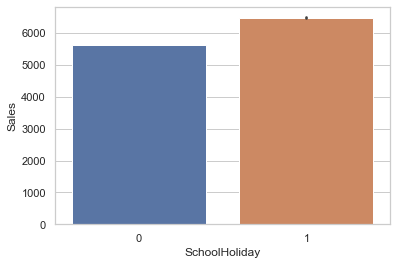

In [30]:
sns.barplot(data=train_data, x="SchoolHoliday", y="Sales")

<AxesSubplot:xlabel='SchoolHoliday', ylabel='Sales'>

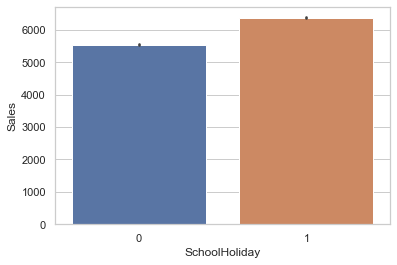

In [23]:
sns.barplot(data=train_data, x="SchoolHoliday", y="Sales")

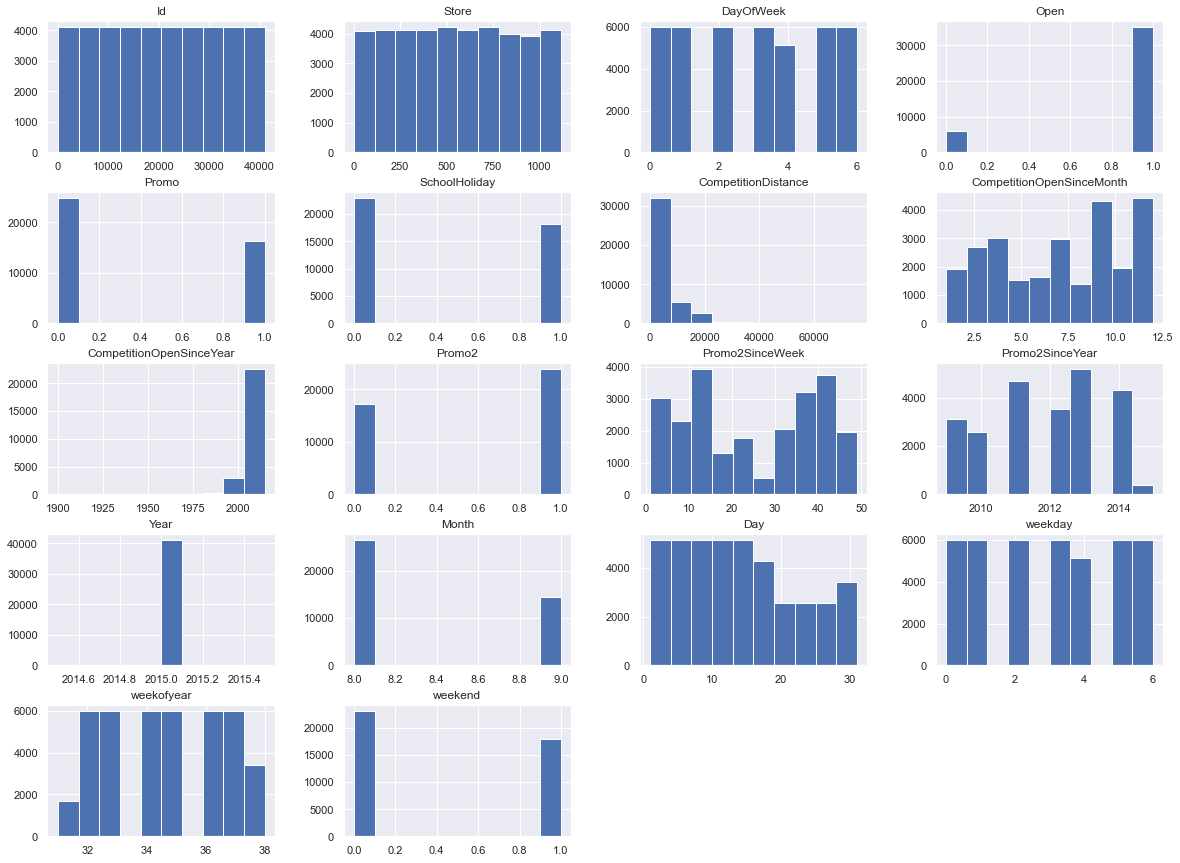

In [31]:
mp.plot_hist_muli(test_data)

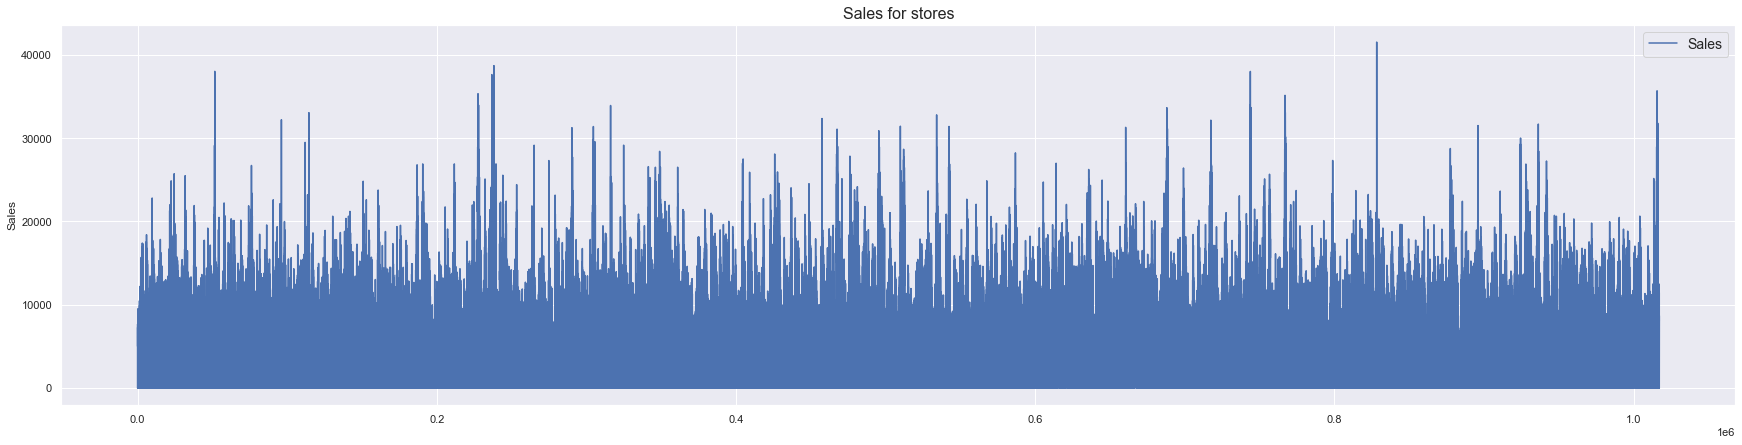

In [32]:
sns.set()
train_data[['Sales', 'StoreType']].plot(figsize=(30, 7))
plt.ylabel("Sales")
plt.title("Sales for stores", fontsize=16)
plt.legend(fontsize=14);

In [33]:
# Check & compare sales behavior before, during and after holidays
holiday_data = train_data.groupby(['StateHoliday'])['Sales'].mean().reset_index()
holiday_data.head()

StateHoliday        Sales
0            0  5947.483893
1            a   290.735686
2            b   214.311510
3            c   168.733171

In [34]:
holiday_data.replace({'StateHoliday': {'0': 'No Holiday', 'a': 'Public Holiday', 'b': 'Easter Holiday', 'c': 'Christmas'}}, inplace=True)

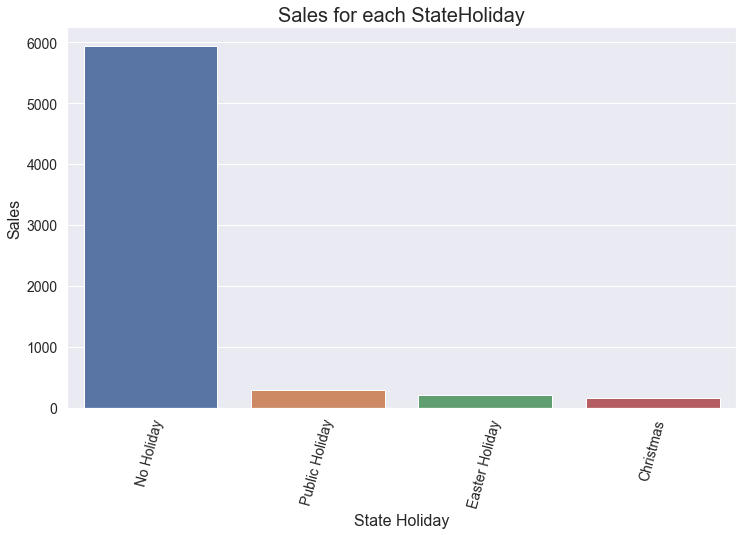

In [35]:
mp.plot_bar(holiday_data, 'StateHoliday', 'Sales', 'Sales for each StateHoliday', 'State Holiday', 'Sales')

In [ ]:
# As shown in the Bargraph, there is low sales amount during oliday

# sales pattern during School holiday

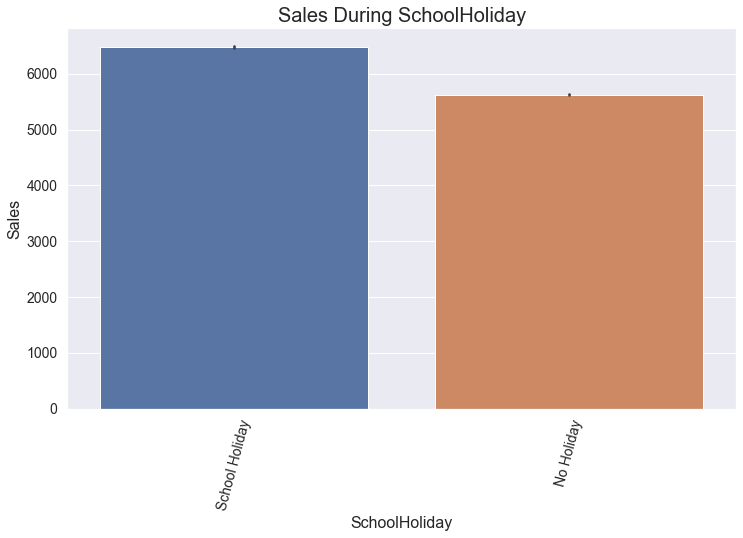

In [36]:
mp.plot_bar(train_data.replace({'SchoolHoliday': {0: 'No Holiday', 1: 'School Holiday'}}), 'SchoolHoliday', 'Sales', 'Sales During SchoolHoliday', 'SchoolHoliday', 'Sales')

In [41]:
school = train_data.groupby(['SchoolHoliday'])['Sales'].mean().reset_index()
school.head()

SchoolHoliday        Sales
0              0  5620.979034
1              1  6476.522207

<AxesSubplot:xlabel='SchoolHoliday', ylabel='Sales'>

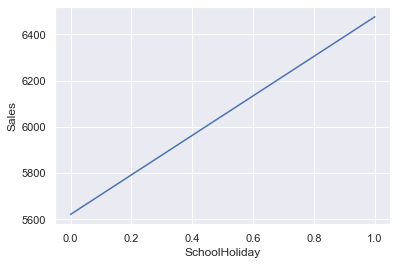

In [42]:
sns.lineplot(x='SchoolHoliday', y='Sales', data=school)

In [37]:
year = train_data.groupby(['Year'])['Sales'].mean().reset_index()
year.head()

Year        Sales
0  2013  5658.533675
1  2014  5833.290704
2  2015  5878.245380

<AxesSubplot:xlabel='Year', ylabel='Sales'>

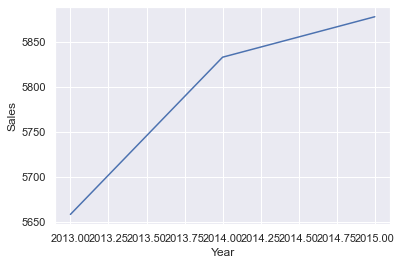

In [38]:
# Observe the Sale Trend using line plot
sns.lineplot(x='Year', y='Sales', data=year)

# The trend shown above is that at each year sales Amount increases from year to year

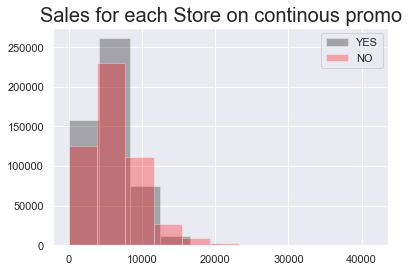

In [44]:
mp.plot_hist_2d(train_data[train_data['Promo2'] == 1], train_data[train_data['Promo2'] == 0], 'Sales', 'Sales', 'Sales for each Store on continous promo', 'YES', 'NO')


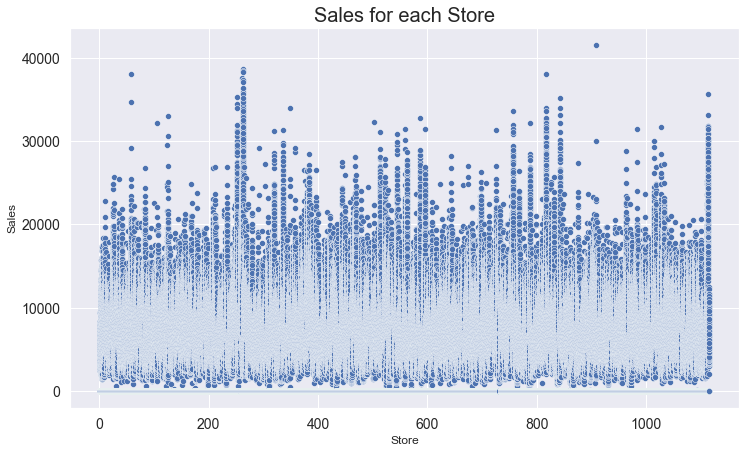

In [45]:
mp.plot_scatter(train_data, train_data['Store'], train_data['Sales'], 'Sales for each Store', None, None)

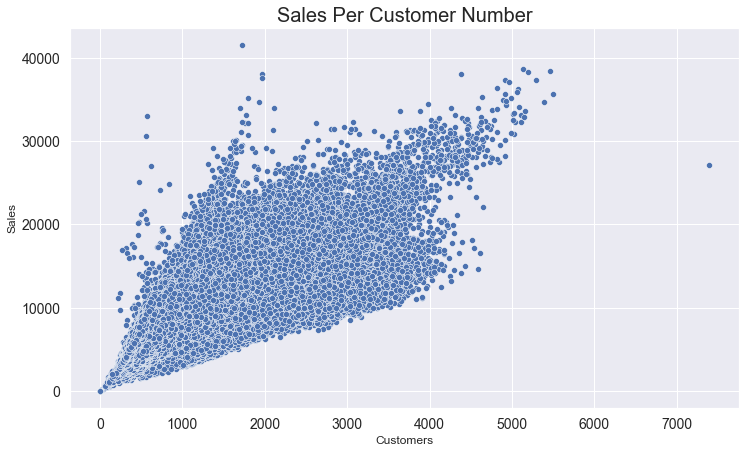

In [47]:
mp.plot_scatter(train_data, train_data['Customers'], train_data['Sales'], 'Sales Per Customer Number', None, None)

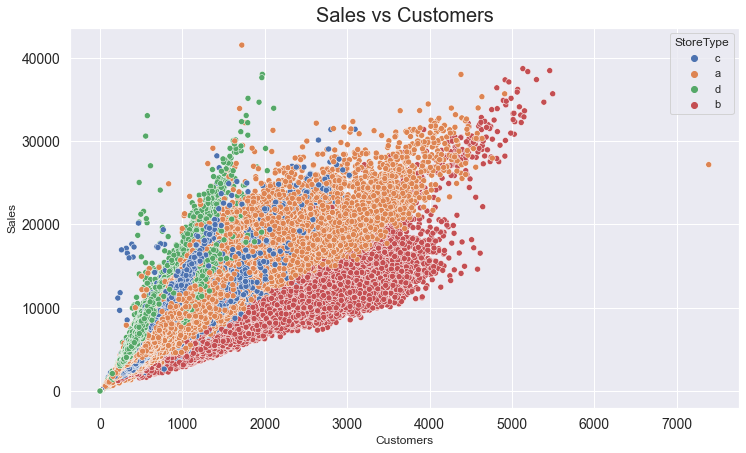

In [51]:
mp.plot_scatter(train_data[attributes], train_data['Customers'], train_data['Sales'], 'Sales vs Customers', train_data['StoreType'], None)

In [ ]:
# The spread in the scatter plot represents the presence of Outliers, so we need to remove it using appropriate technique

<Figure size 864x504 with 0 Axes>

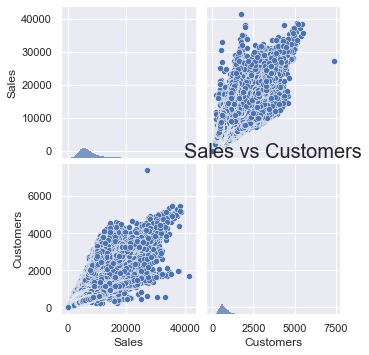

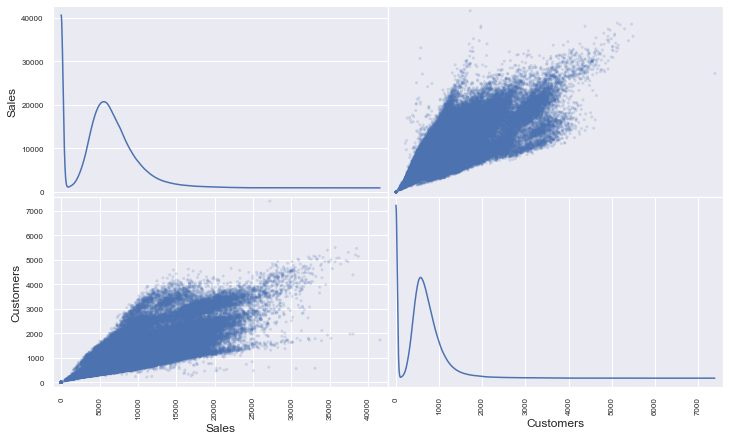

In [50]:
#Sales_Customers
attributes = ["Sales", "Customers"]
mp.sc_matrix(train_data[attributes], "Sales vs Customers")

In [ ]:
# From the Above scatter plots, The spread in the scatter plot represents the presence of Outliers, 
# So, we need to remove it using appropriate technique

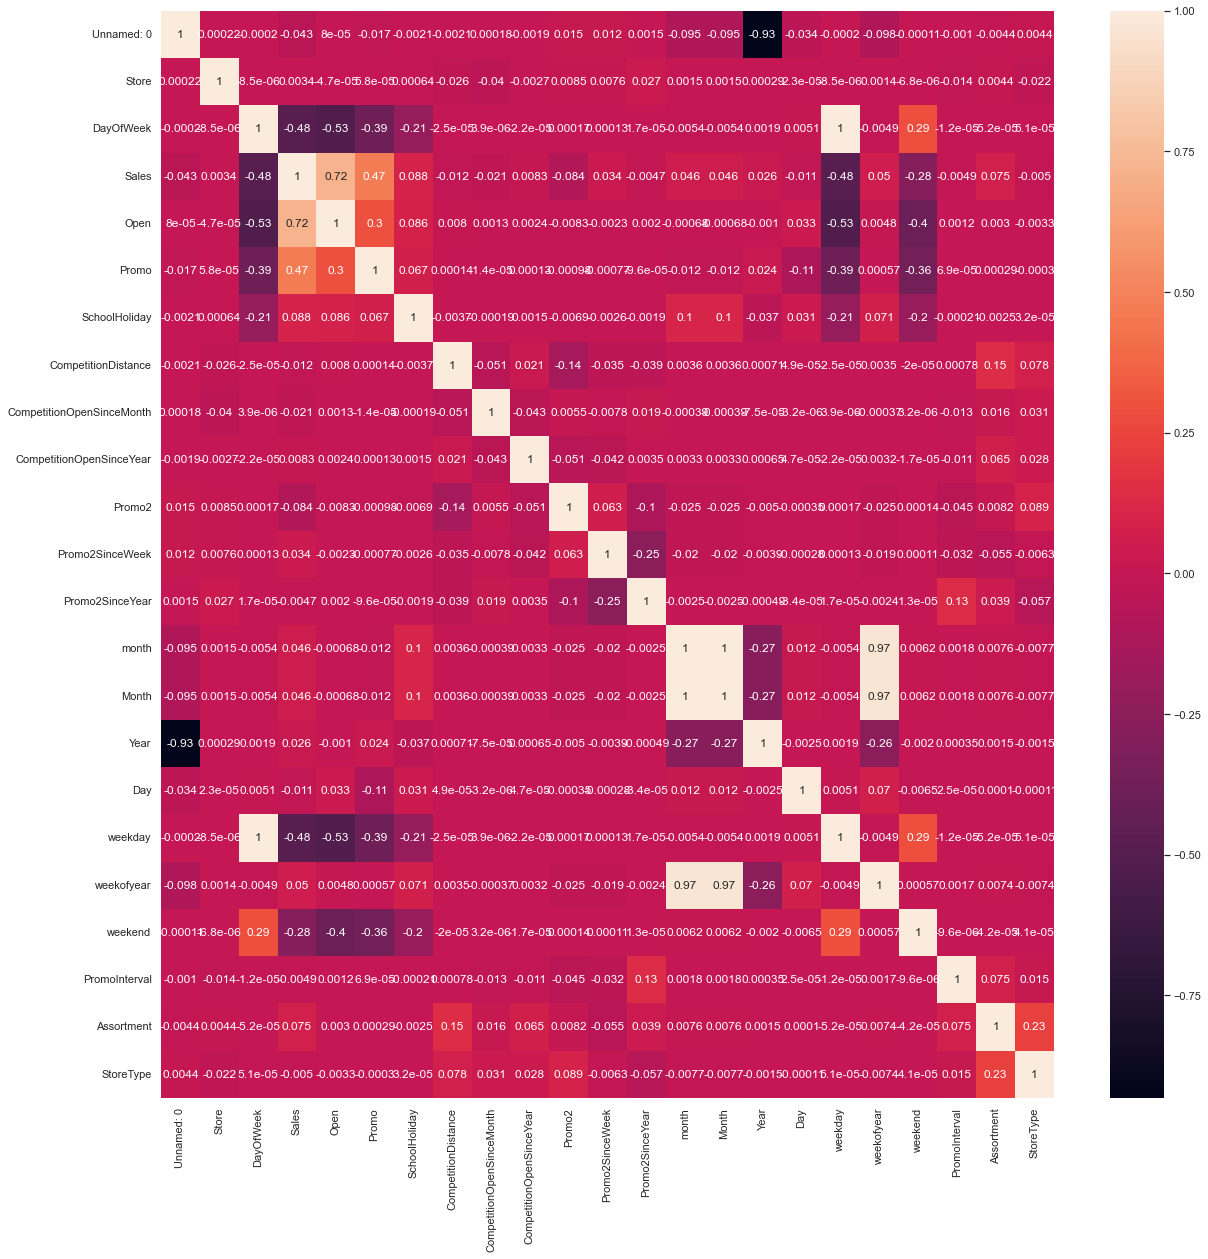

In [25]:
correlations = train_data.corr()
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(correlations, annot = True);

# Find correlation

In [26]:
#Observe the correlation between sales and other attributes
# if there is positive correlation, sales will decrease when other attributes are increased
#For example, the more promotions, the more sales, and the more competitors, the less sales.


In [52]:
import plotly.express as px

axis = train_data.groupby('Month')[['Sales']].mean()
fig = px.line(axis, x = axis.index, y = 'Sales', title = 'Average sales per month', markers = True)
fig.show()

In [53]:
axis = train_data.groupby('Day')[['Sales']].mean()
fig = px.line(axis, x = axis.index, y = 'Sales', title = 'Average sales per day', markers = True)
fig.show()

In [55]:
axis = train_data.groupby('Day')[['Customers']].mean()
fig = px.line(axis, x = axis.index, y = 'Customers', title = 'Average customers per day', markers = True)
fig.show()

In [56]:
axis = train_data.groupby('DayOfWeek')[['Sales']].mean()
fig = px.line(axis, x = axis.index, y = 'Sales', title = 'Average sales per day of the week', markers = True)
fig.show()

<AxesSubplot:xlabel='Open', ylabel='count'>

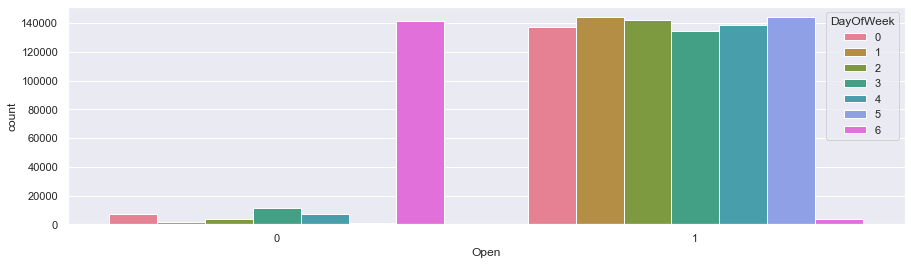

In [58]:
fig, (axis1) = plt.subplots(1,1,figsize=(15,4))
sns.countplot(x='Open',hue='DayOfWeek', data=train_data,palette="husl", ax=axis1)

<AxesSubplot:xlabel='DayOfWeek', ylabel='Customers'>

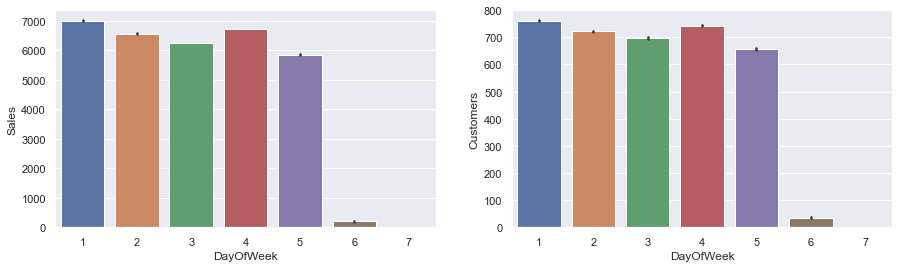

In [59]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))

sns.barplot(x='DayOfWeek', y='Sales', data=train_data, order=[1,2,3,4,5,6,7], ax=axis1)
sns.barplot(x='DayOfWeek', y='Customers', data=train_data, order=[1,2,3,4,5,6,7], ax=axis2)

In [ ]:
# From the above graph, it is shown that type a and b stores have the highest sales

Text(0.5, 1.0, 'Sales vs promotion')

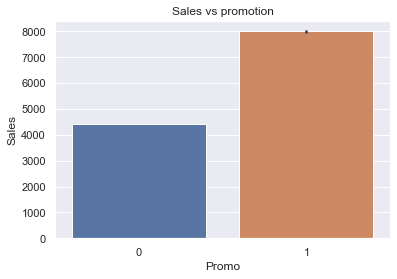

In [60]:
sns.barplot(x = 'Promo', y = 'Sales', data = train_data).set_title('Sales vs promotion')


[]

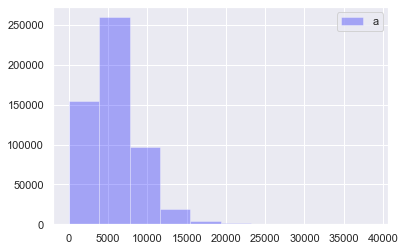

In [64]:
#Sales_Assortment
sns.set()
plt.hist(train_data[train_data['Assortment'] == 'a'].Sales, color='blue', alpha=0.3, label = 'a')

plt.legend()
plt.plot()

(array([ 111., 1058., 1962., 1556., 1430., 1007.,  749.,  339.,   71.,
          11.]),
 array([    0. ,  2213.7,  4427.4,  6641.1,  8854.8, 11068.5, 13282.2,
        15495.9, 17709.6, 19923.3, 22137. ]),
 <BarContainer object of 10 artists>)

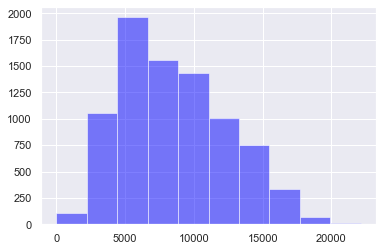

In [69]:
plt.hist(train_data[train_data['Assortment'] == 'b'].Sales, color='blue', alpha=0.5, label='b')

(array([1.23641e+05, 2.35065e+05, 8.72200e+04, 1.83150e+04, 5.46700e+03,
        1.42100e+03, 2.71000e+02, 5.90000e+01, 8.00000e+00, 3.00000e+00]),
 array([    0. ,  4155.1,  8310.2, 12465.3, 16620.4, 20775.5, 24930.6,
        29085.7, 33240.8, 37395.9, 41551. ]),
 <BarContainer object of 10 artists>)

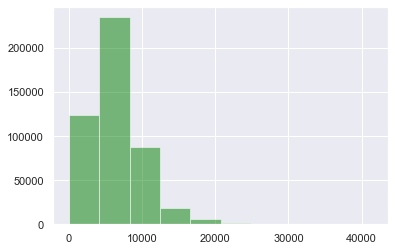

In [71]:
plt.hist(train_data[train_data["Assortment"]=='c'].Sales, color='green',alpha=0.5, label='c')

# Sales Overview When the Store is Open and Closed

(array([1.23856e+05, 5.05472e+05, 1.69792e+05, 3.32340e+04, 8.90100e+03,
        2.36200e+03, 5.65000e+02, 1.74000e+02, 2.80000e+01, 8.00000e+00]),
 array([    0. ,  4155.1,  8310.2, 12465.3, 16620.4, 20775.5, 24930.6,
        29085.7, 33240.8, 37395.9, 41551. ]),
 <BarContainer object of 10 artists>)

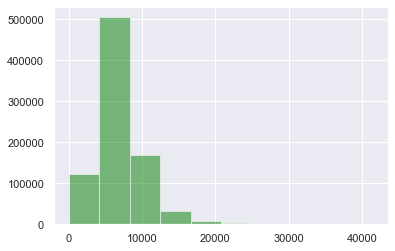

In [87]:
plt.hist(train_data[train_data["Open"]==1].Sales, color='green',alpha=0.5, label='c')


(array([     0.,      0.,      0.,      0.,      0., 172817.,      0.,
             0.,      0.,      0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <BarContainer object of 10 artists>)

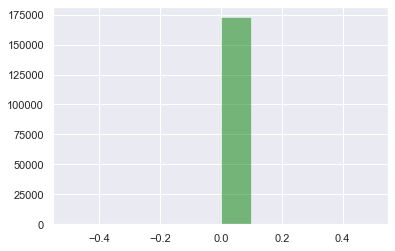

In [88]:
plt.hist(train_data[train_data["Open"]==0].Sales, color='green',alpha=0.5, label='c')


# Overview of Sales with Assortment Type

[]

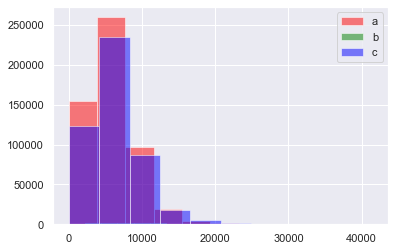

In [72]:
sns.set()
plt.hist(train_data[train_data['Assortment'] == 'a'].Sales, color='red', alpha=0.5, label = 'a')
plt.hist(train_data[train_data['Assortment'] == 'b'].Sales, color='green', alpha=0.5, label = 'b')
plt.hist(train_data[train_data['Assortment'] == 'c'].Sales, color='blue', alpha=0.5, label = 'c')
plt.legend()
plt.plot()

[]

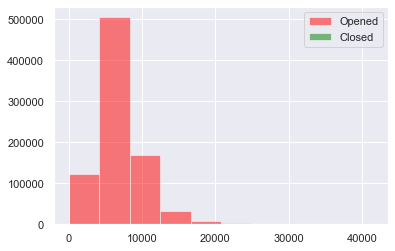

In [90]:
sns.set()
plt.hist(train_data[train_data['Open'] == 1].Sales, color='red', alpha=0.5, label = 'Opened')
plt.hist(train_data[train_data['Open'] == 0].Sales, color='green', alpha=0.5, label = 'Closed')
plt.legend()
plt.plot()

There is High Sales when store is open

In [ ]:
# From the above Plot, Assortment a has the highest Sales amount, b has the next and c has the lowest Sales Amount

<AxesSubplot:title={'center':'Promo vs.Sales'}, xlabel='Promo', ylabel='Sales'>

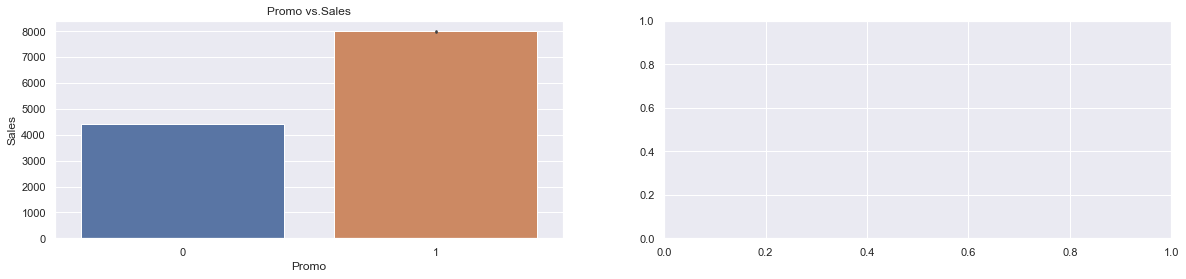

In [61]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(20,4))

axis1.title.set_text('Promo vs.Sales')
#axis2.title.set_text('Promo vs.Customers')
sns.barplot(x='Promo', y='Sales', data=train_data, ax=axis1)
#sns.barplot(x='Promo', y='Customers', data=train, ax=axis2)

<AxesSubplot:xlabel='StateHoliday', ylabel='Sales'>

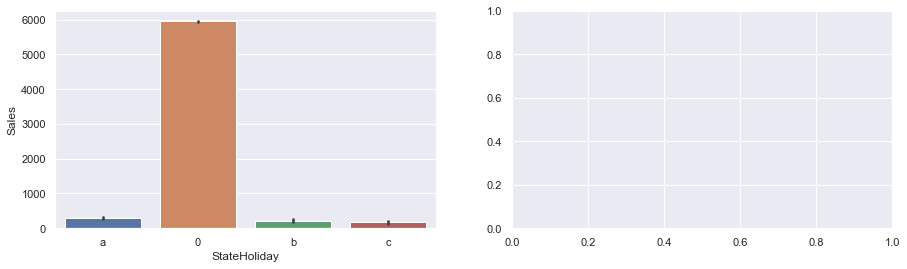

In [62]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))

sns.barplot(x='StateHoliday', y='Sales', data= train_data, ax=axis1)

# Sales with Compitetor distance

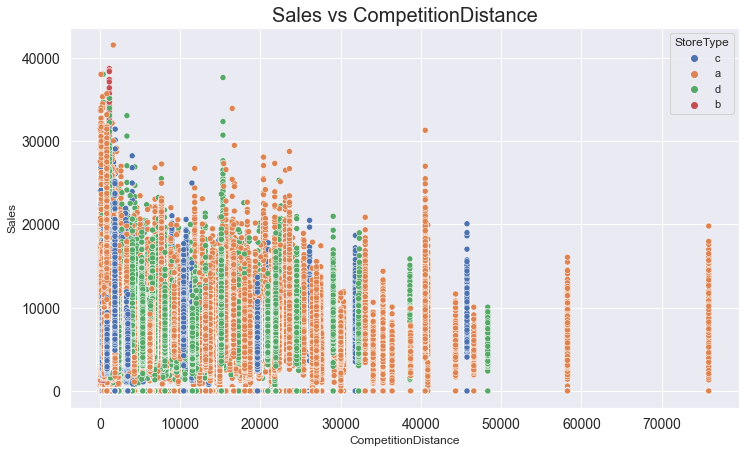

In [77]:
attributes = ["Sales", "CompetitionDistance"]
mp.plot_scatter(train_data[attributes], train_data['CompetitionDistance'], train_data['Sales'], 'Sales vs CompetitionDistance', train_data['StoreType'], None)

In [78]:
train_data.columns

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Year', 'Month', 'Day', 'weekday',
       'weekofyear', 'weekend'],
      dtype='object')

In [81]:
axis = train_data.groupby('CompetitionDistance')[['Sales']].mean()
fig = px.line(axis, x = axis.index, y = 'Sales', title = 'Average sales per day of the week', markers = True)
fig.show()

from the Above plot, as competition distance increases sales amount will Decrease

In [84]:
axis = train_data.groupby('CompetitionOpenSinceMonth')[['Sales']].mean()
fig = px.line(axis, x = axis.index, y = 'Sales', title = 'Sales vs Competetor Open since Month', markers = True)
fig.show()

In [85]:
axis = train_data.groupby('CompetitionOpenSinceYear')[['Sales']].mean()
fig = px.line(axis, x = axis.index, y = 'Sales', title = 'Sales vs Competetor Open since Year', markers = True)
fig.show()

<AxesSubplot:xlabel='StoreType', ylabel='Sales'>

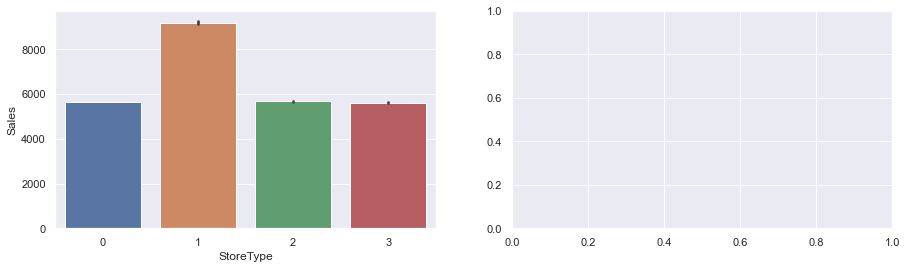

In [43]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))

sns.barplot(x='StoreType', y='Sales', data= train_data, ax=axis1)

In [ ]:
# Sales per Year
train_data.boxplot(column='Sales', by='Year',)
plt.show()

In [ ]:

sns.barplot(data=train_data, x="Year", y="Sales")



In [ ]:
#Sales per months
train_data.boxplot(column='Sales', by='Month',)
plt.show()

In [ ]:
sns.barplot(data=train_data, x="Month", y="Sales")


In [ ]:
sns.barplot(x = 'Promo', y = 'Customers', data = sales_train_all_df).set_title('Customers with promotion')


(array([1.72740e+05, 2.60817e+05, 9.06440e+04, 1.97250e+04, 5.60000e+03,
        1.59700e+03, 3.94000e+02, 1.00000e+02, 8.00000e+00, 2.00000e+00]),
 array([    0. ,  4155.1,  8310.2, 12465.3, 16620.4, 20775.5, 24930.6,
        29085.7, 33240.8, 37395.9, 41551. ]),
 <BarContainer object of 10 artists>)

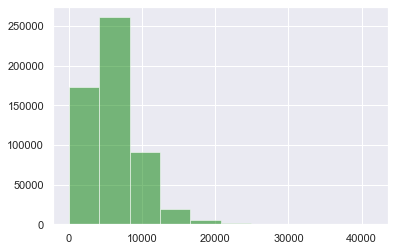

In [94]:
plt.hist(train_data[train_data['StoreType'] == 'a'].Sales, color='green', alpha=0.5, label = 'a')


(array([1155., 5072., 4499., 2576., 1632.,  640.,  125.,   89.,   30.,
          12.]),
 array([    0. ,  3872.2,  7744.4, 11616.6, 15488.8, 19361. , 23233.2,
        27105.4, 30977.6, 34849.8, 38722. ]),
 <BarContainer object of 10 artists>)

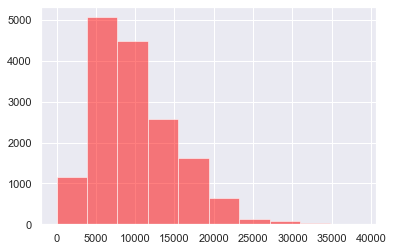

In [95]:
plt.hist(train_data[train_data['StoreType'] == 'b'].Sales, color='red', alpha=0.5, label = 'b')


(array([2.8140e+04, 5.0079e+04, 4.0345e+04, 1.3140e+04, 3.5800e+03,
        1.0980e+03, 3.2700e+02, 1.0800e+02, 1.9000e+01, 4.0000e+00]),
 array([    0. ,  3144.8,  6289.6,  9434.4, 12579.2, 15724. , 18868.8,
        22013.6, 25158.4, 28303.2, 31448. ]),
 <BarContainer object of 10 artists>)

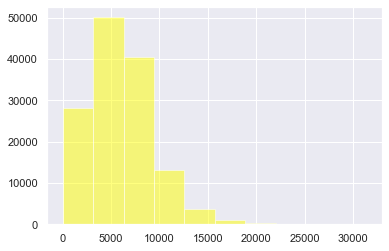

In [96]:
plt.hist(train_data[train_data['StoreType'] == 'c'].Sales, color='yellow', alpha=0.5, label = 'c')

(array([7.31450e+04, 1.58621e+05, 6.77040e+04, 1.11320e+04, 1.76900e+03,
        4.21000e+02, 8.40000e+01, 2.40000e+01, 8.00000e+00, 4.00000e+00]),
 array([    0. ,  3803.7,  7607.4, 11411.1, 15214.8, 19018.5, 22822.2,
        26625.9, 30429.6, 34233.3, 38037. ]),
 <BarContainer object of 10 artists>)

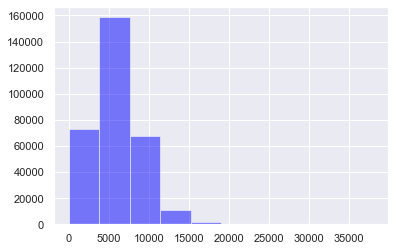

In [97]:
plt.hist(train_data[train_data['StoreType'] == 'd'].Sales, color='blue', alpha=0.5, label = 'd')


In [ ]:
# The spread in the scatter plot represents the presence of Outliers, so we need to remove it using appropriate technique

[]

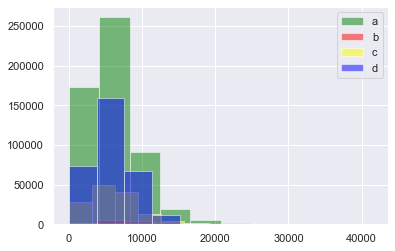

In [92]:
sns.set()
plt.hist(train_data[train_data['StoreType'] == 'a'].Sales, color='green', alpha=0.5, label = 'a')
plt.hist(train_data[train_data['StoreType'] == 'b'].Sales, color='red', alpha=0.5, label = 'b')
plt.hist(train_data[train_data['StoreType'] == 'c'].Sales, color='yellow', alpha=0.5, label = 'c')
plt.hist(train_data[train_data['StoreType'] == 'd'].Sales, color='blue', alpha=0.5, label = 'd')
plt.legend()
plt.plot()

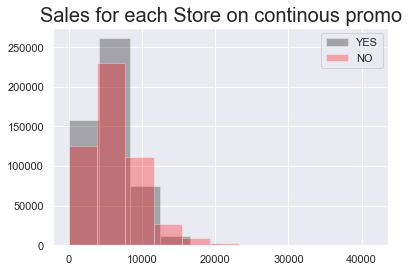

In [93]:
mp.plot_hist_2d(train_data[train_data['Promo2'] == 1], train_data[train_data['Promo2'] == 0], 'Sales', 'Sales', 'Sales for each Store on continous promo', 'YES', 'NO')


# When there is Promotion, Sales Amount will Increase